In [1]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/lea/trampo/data_format')
from save_keypoints import save_to_openpose

In [2]:
def project(joints_3d, cam_trans, size, scale=1):
    f = 5000

    K = np.array([[f/256, 0, 0],
                [0, f/256, 0],
                [0, 0, 1]])
    R = np.eye(3)

    points = joints_3d + cam_trans # (4,3)

    proj = (K @ R @ points.T).T # (4,3)
    proj_norm = proj[:,:2] / proj[:,2].reshape(-1,1)
    proj_im = proj_norm * max(size) * scale
    proj_im += np.array(size[::-1])/2
    return proj_im

## Save keypoints

In [3]:
path = '/home/lea/trampo/4DHumans/outputs/results'
for file in os.listdir(path):
    results = joblib.load(os.path.join(path, file))
    savepath = os.path.join('/home/lea/trampo/Pose2Sim/pose_all_4dhumans', file[5:-4] + '_json')
    os.makedirs(savepath, exist_ok=True)

    for frame in results:
        keypoints = []
        conf_array = []

        frame_res = results[frame]
        frame_idx = frame_res['time']

        for d in range(len(frame_res['tracked_ids'])):
            joints_3d = frame_res['3d_joints'][d]
            cam_trans = frame_res['camera'][d]
            size = frame_res['size'][d]
            conf = frame_res['conf'][d]
        
            joints_2d = project(joints_3d, cam_trans, size)
            keypoints.append(joints_2d)
            conf_array.append(conf * np.ones((joints_2d.shape[0])))

        save_to_openpose(os.path.join(savepath, f'frame_{frame_idx:06d}.json'), keypoints, conf_array)

KeyboardInterrupt: 

## Find keypoints matching between 4DHumans (45) and Pose2Sim triangulation (13)

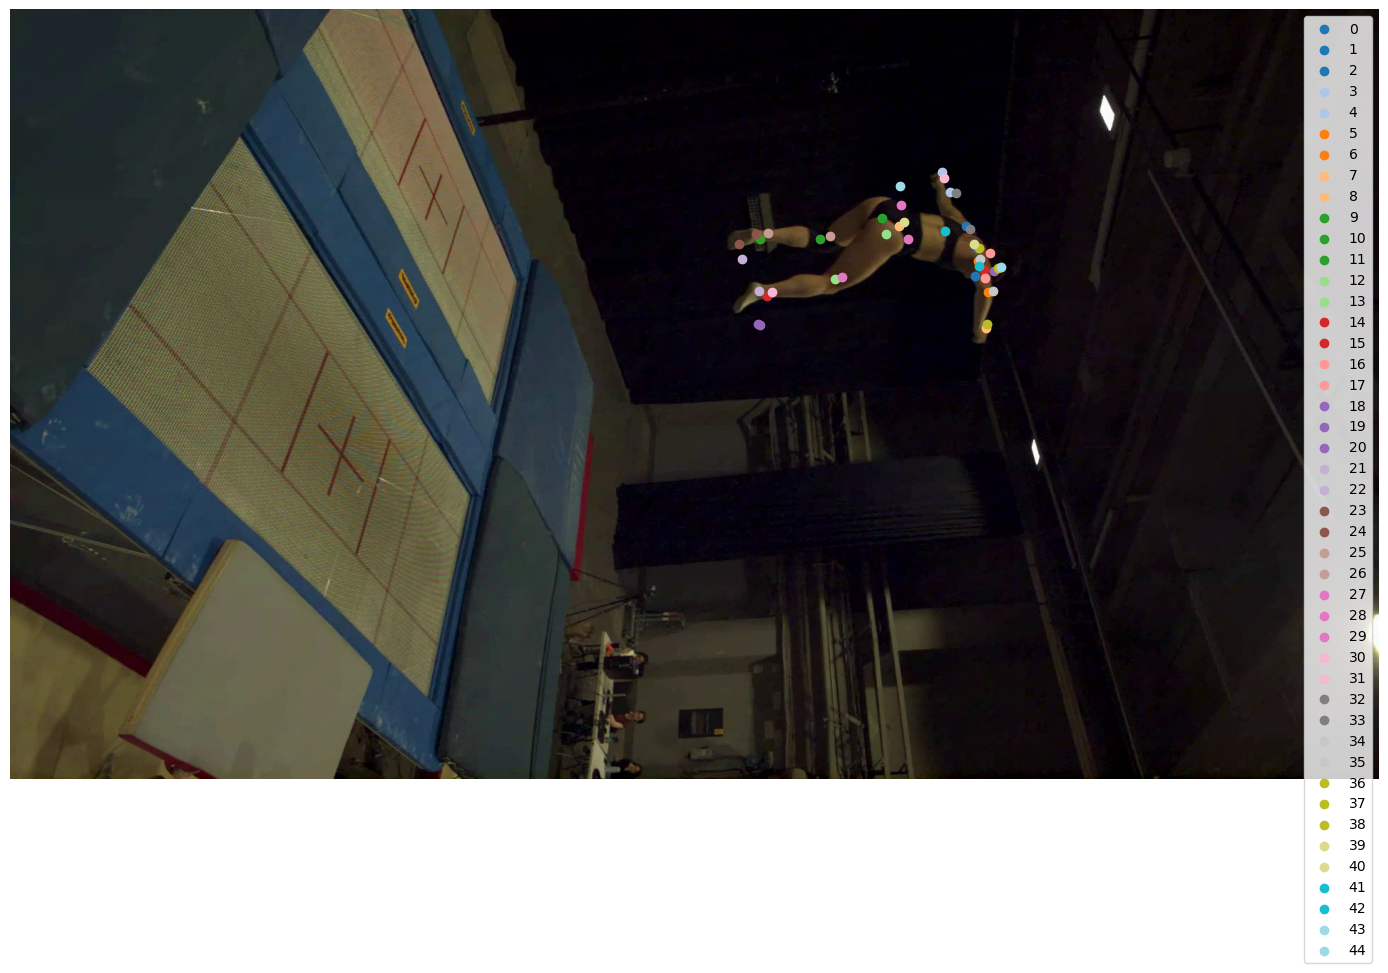

In [4]:
import matplotlib.image as mpimg

cmap_name = 'tab20'
cmap = plt.get_cmap(cmap_name)
colors = [cmap(i/45) for i in range(45)]

img = mpimg.imread('/home/lea/trampo/4DHumans/outputs/_DEMO/1_partie_0429_021-Camera1_M11139/img/000451.jpg')

fig, ax = plt.subplots(figsize=(19, 10))
ax.imshow(img)  # Show image background

for i, (x, y) in enumerate(joints_2d):
    ax.scatter(x, y, color=colors[i], label=i)

ax.invert_yaxis()
ax.axis('off')
ax.legend()
plt.show()